In [1]:
import cmdstanpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib widget
sns.set()  # Nice plot aesthetic
rng = np.random.default_rng()

In [2]:
class Model_dirs():
    def __init__(self, dir_name=None):
        if dir_name is None: dir_name = "stan_files"    
        self.cur_dir = os.getcwd()
        self.stan_dir = os.path.join(os.getcwd(), dir_name)
        try:
            os.mkdir(self.stan_dir)
        except:
            print("overwriting directory")
        self.stan_model = os.path.join(self.stan_dir, "stan_model.stan")
        
    def create_files(self, s_model):
        f = open(self.stan_model, "w")
        f.write(s_model)
        f.close()

In [3]:
def normal_pdf(x, mean, std):
    return np.exp((-1*pow((x - mean),2))/(2 * std**2))/(std*np.sqrt(2 * np.pi))

In [4]:
plt.close("all")

In [5]:
mean = 3
std = 0.5
reps = 1000

arr = rng.normal(mean,std, size=(reps))
x = np.linspace(-5,5,reps)
y = normal_pdf(x, mean,std)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
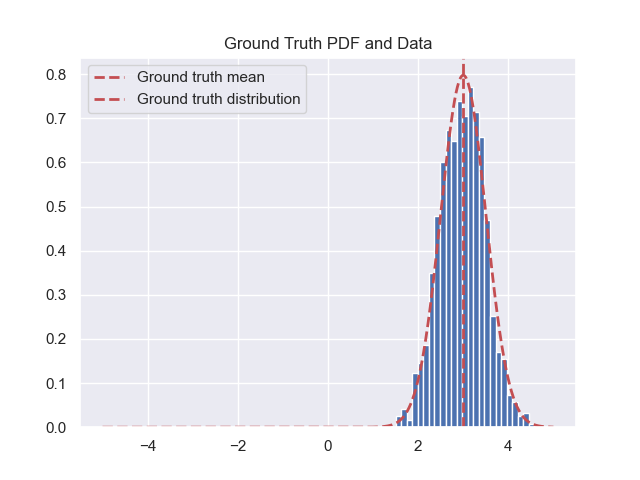

In [6]:
fig, ax = plt.subplots()
ax.hist(arr, bins=25, density=True)
plt.axvline(x=mean, color="r", linestyle="--", linewidth=2, label="Ground truth mean")
ax.plot(x, y, color="r", linestyle="--", linewidth=2, label="Ground truth distribution")
plt.title("Ground Truth PDF and Data")
ax.legend()

plt.show()

In [7]:
stan_model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real mu;
    real<lower=0> sigma;
}
model {
    y ~ normal(mu + x, sigma);
}
"""
st_model = Model_dirs("stan_test2")
st_model.create_files(stan_model)

In [8]:
# Put our data in a dictionary
data = {'N': len(arr), 'x': x, 'y': arr}

# instantiate the model
model = cmdstanpy.CmdStanModel(stan_file=st_model.stan_model)

#fir the model
fit = model.sample(data=data, output_dir=st_model.stan_dir)
print(fit)

INFO:cmdstanpy:compiling stan program, exe file: /Users/philip/Documents/research/bp/testing/stan_test2/stan_model
INFO:cmdstanpy:compiler options: stanc_options={}, cpp_options={}
INFO:cmdstanpy:compiled model file: /Users/philip/Documents/research/bp/testing/stan_test2/stan_model
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3


CmdStanMCMC: model=stan_model chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/Users/philip/Documents/research/bp/testing/stan_test2/stan_model-202111101947-1.csv
	/Users/philip/Documents/research/bp/testing/stan_test2/stan_model-202111101947-2.csv
	/Users/philip/Documents/research/bp/testing/stan_test2/stan_model-202111101947-3.csv
	/Users/philip/Documents/research/bp/testing/stan_test2/stan_model-202111101947-4.csv
 output_files:
	/Users/philip/Documents/research/bp/testing/stan_test2/stan_model-202111101947-1-stdout.txt
	/Users/philip/Documents/research/bp/testing/stan_test2/stan_model-202111101947-2-stdout.txt
	/Users/philip/Documents/research/bp/testing/stan_test2/stan_model-202111101947-3-stdout.txt
	/Users/philip/Documents/research/bp/testing/stan_test2/stan_model-202111101947-4-stdout.txt


In [9]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-1600.0,0.0250,1.100,-1600.0,-1600.0,-1600.0,1700.0,2700.0,1.0
mu,3.0,0.0016,0.095,2.8,3.0,3.1,3700.0,5700.0,1.0
sigma,2.9,0.0011,0.067,2.8,2.9,3.1,3700.0,5800.0,1.0


In [10]:
# alpha = fit.stan_variable(var="alpha")
# beta = fit.stan_variable(var="beta")
# sigma = fit.stan_variable(var="sigma")
f = fit.summary()
mu_mean = f["Mean"]["mu"]
sig_mean = f["Mean"]["sigma"]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
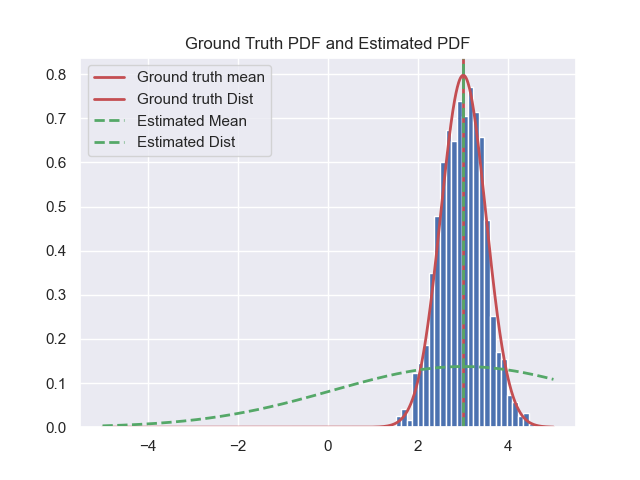

In [11]:
fig, ax = plt.subplots()
ax.hist(arr, bins=25, density=True)
ax.axvline(x=mean, color="r", linestyle="-", linewidth=2, label="Ground truth mean")
ax.plot(x, y, color="r", linestyle="-", linewidth=2, label="Ground truth Dist")

ax.axvline(x=mu_mean, color="g", linestyle="--", linewidth=2, label="Estimated Mean")
ax.plot(x, normal_pdf(x, mu_mean, sig_mean), color="g", linestyle="--", linewidth=2, label="Estimated Dist")
plt.title("Ground Truth PDF and Estimated PDF")
ax.legend()

plt.show()